In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install emot --upgrade
# to convert emojis to text
!pip install emoji
#to expand a contracted words
!pip install demoji
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=e19a805b1ca2a382e17c87ff06b7a50fd92114c892a38e18a453ed6de8083b91
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
import emot
import nltk.data
import numpy as np
import pandas as pd
import re
import time
import string
import emoji
import demoji
import contractions
import nltk
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
pd.set_option("max_colwidth" ,220)
wn = nltk.WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
demoji.download_codes()
def emo(text):
  temp=emoji.demojize(text,delimiters=(" "," "))
  temp=temp.replace("_","  ")
  return temp

<ipython-input-4-e00aa54160fe>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
demoji.download_codes()
def emo(text):
  try:
   temp=emoji.demojize(str(text),delimiters=(" "," "))
   temp=temp.replace("_","  ")
   return temp
  except IndexError:
        return ""

<ipython-input-5-82a5fb4117d1>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
punct="!#$%&\'()*+,-.’’/:;<=>?@[\\]^_`{|}~’“‘"

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', str(text))

In [ ]:
def clean_text(text):
    text = re.sub('@[a-zA-Z0-9]*', '', str(text))#to remove @ and its following word
    text = contractions.fix(text, slang=True)
    text = "".join([word.lower() for word in text if word not in string.punctuation]) #to remove punctuation
    text="".join([word.lower() for word in text if word not in punct])
    text = "".join([word for word in text if not word.isdigit()])#to remove digit
    text = " ".join(word for word in text.split() if word not in stopwords)
    return text

In [ ]:
import pandas as pd

In [ ]:
asa_train=pd.read_csv('/content/drive/MyDrive/hasoc/task4/assam/train_A_AH_HASOC2023.csv')
# asa_test=pd.read_csv('/content/drive/MyDrive/hasoc/task4/assam/test_A_AH_HASOC2023.csv')

In [ ]:
asa_train['clean_text'] = asa_train['text'].apply(lambda x:emo(x))
asa_train['clean_text'] = asa_train['clean_text'].apply(lambda x:remove_urls(x))
asa_train['clean_text'] = asa_train['clean_text'].apply(lambda x:clean_text(x))

In [ ]:
asa_train[asa_train['clean_text'] =='**********************']

,S. No.,text,task_1,clean_text


In [ ]:
asa_train['clean_text']

0                                                                                                                                              লাগিলে ইযাৰ পৰাই কলি লাগাম
1                                                                           আমি গেদা মই গেদা হা হা rolling floor laughing rolling floor laughing rolling floor laughing ।
2                                              মানুহে যেতিয়া নিজৰ জীৱন টো নিজৰ কাৰণে সমাজৰ কাৰণে দেশৰ কাৰণে পৃথিৱীৰ কাৰণে কিমান মূল্যবান বুজি নাপায় তেতিয়া এনেকুৱা হয়
3                                                                                                                           কতি খন কোন দিনা দেখা পাও তাকে বাত চায় আছো মই
4       কাপোৰ খন বাৰু চাইকেল লৈ অহা মানুহজনৰ মুখত দলিয়াব লাগেনে বেছেৰাটো গুচি গল সেইকাৰণে বেয়া পায়। rolling floor laughing rolling floor laughing rolling floor laughing
                                                                                      ...                                                             

In [ ]:
# build train and test datasets
txt = asa_train['clean_text'].values
lab = asa_train['task_1'].values

train_reviews = txt[:960]
train_sentiments = lab[:960]

test_reviews = txt[960:]
test_sentiments = lab[960:]

In [ ]:
#split the dataset into train and test sets
X_train1, X_test1, y_train1, y_test1= train_test_split(asa_train.clean_text,asa_train.task_1,test_size=0.25, random_state=42)

In [ ]:
X_train1.shape, X_test1.shape

((3027,), (1009,))

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

In [ ]:
t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(train_reviews)
t.word_index['<PAD>'] = 0

In [ ]:
t.word_index

{'<UNK>': 1,
 '।': 2,
 'আৰু': 3,
 'নাই': 4,
 'ভাল': 5,
 'লাগে': 6,
 'এই': 7,
 'কৰি': 8,
 'আছে': 9,
 'কি': 10,
 'কথা': 11,
 'দিব': 12,
 'পৰা': 13,
 'আমাৰ': 14,
 'কাম': 15,
 'বুলি': 16,
 'কৰিব': 17,
 'হব': 18,
 'face': 19,
 'বহুত': 20,
 'অসমৰ': 21,
 '৷': 22,
 'এটা': 23,
 'নিজৰ': 24,
 'মোৰ': 25,
 'যে': 26,
 'কৰা': 27,
 'মানুহ': 28,
 'হৈ': 29,
 'নেকি': 30,
 'আমি': 31,
 'কোনো': 32,
 'এইবোৰ': 33,
 'গেদা': 34,
 'মই': 35,
 'নহয়': 36,
 'অসমীয়া': 37,
 'ছোৱালী': 38,
 'যদি': 39,
 'হল': 40,
 'অসমত': 41,
 'কেলা': 42,
 'হিন্দু': 43,
 'বা': 44,
 'ও': 45,
 'কিয়': 46,
 'বাবে': 47,
 'আপোনাৰ': 48,
 'অসম': 49,
 'ৰ': 50,
 'মানুহে': 51,
 'কিন্তু': 52,
 'ইমান': 53,
 'লগত': 54,
 'লাগিব': 55,
 'চাই': 56,
 'এতিয়া': 57,
 'হয়': 58,
 'হৈছে': 59,
 'বেয়া': 60,
 'দৰে': 61,
 'খন': 62,
 'লৈ': 63,
 'আপুনি': 64,
 'বেছি': 65,
 'যেন': 66,
 'কৰিলে': 67,
 'কাৰণে': 68,
 'হয়': 69,
 'নে': 70,
 'সকলো': 71,
 'অলপ': 72,
 'কৈ': 73,
 'ই': 74,
 'অসমীয়া': 75,
 'কৰিছে': 76,
 'তাই': 77,
 'দেখা': 78,
 'থাকিব': 79,
 'পাৰে': 80,
 'দি': 81

In [ ]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]), t.word_index['<UNK>']

(('নাৰাখে', 4106), ('<PAD>', 0), 1)

In [ ]:
train_sequences = t.texts_to_sequences(train_reviews)

In [ ]:
train_sequences

[[429, 1157, 252, 1158, 1159],
 [31, 34, 35, 34, 633, 633, 170, 171, 172, 170, 171, 172, 170, 171, 172, 2],
 [51,
  1160,
  24,
  253,
  114,
  24,
  68,
  319,
  68,
  320,
  68,
  634,
  68,
  104,
  635,
  94,
  321,
  636,
  133,
  69],
 [1161, 62, 148, 1162, 78, 322, 323, 1163, 1164, 149, 35],
 [209,
  62,
  324,
  1165,
  63,
  173,
  637,
  430,
  1166,
  1167,
  1168,
  1169,
  325,
  254,
  85,
  1170,
  170,
  171,
  172,
  170,
  171,
  172,
  170,
  171,
  172],
 [1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178],
 [1179, 431, 638],
 [1180, 95, 21, 1181],
 [1182, 1183, 1184, 1185, 4, 22],
 [57, 639, 326, 63, 1186, 210, 105, 1187, 106],
 [1188,
  114,
  133,
  95,
  26,
  432,
  1189,
  8,
  640,
  433,
  434,
  174,
  13,
  32,
  327,
  1190,
  175],
 [35,
  1191,
  176,
  177,
  1192,
  1193,
  1194,
  255,
  1195,
  641,
  1196,
  642,
  435,
  1197,
  36,
  642,
  1198,
  1199,
  211,
  1200,
  256,
  1201,
  212,
  1202],
 [328,
  329,
  330,
  1203,
  257,
  7,
  1204,
 

In [ ]:
test_sequences = t.texts_to_sequences(test_reviews)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=4107
Number of Documents=960


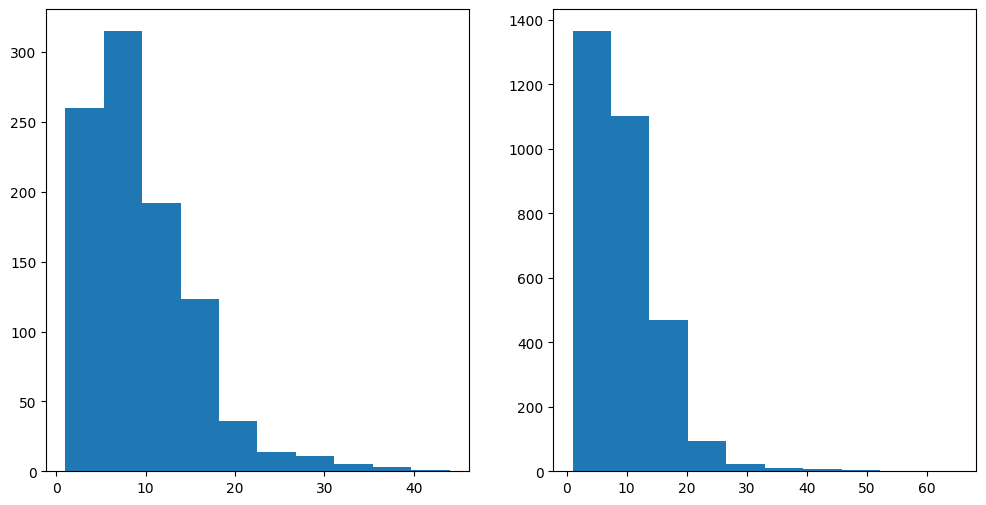

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
# pad dataset to a maximum review length in words
X_train = sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((960, 1000), (3076, 1000))

In [ ]:
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0

In [ ]:
y_train = le.fit_transform(train_sentiments)
y_test = le.transform(test_sentiments)

In [ ]:
y_test

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
tt = [1,1,1, 0, 1]
print(le.inverse_transform(tt))

['NOT' 'NOT' 'NOT' 'HOF' 'NOT']


In [ ]:
VOCAB_SIZE = len(t.word_index)

In [ ]:
EMBED_SIZE = 300
EPOCHS=5
BATCH_SIZE=128

In [ ]:
# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         1232100   
                                                                 
 conv1d (Conv1D)             (None, 1000, 128)         153728    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 500, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 250, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 32)           8

In [ ]:
# Fit the model
model.fit(X_train, y_train,
          validation_split=0.1,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          verbose=1)

Epoch 1/5
7/7 [==============================] - 34s 4s/step - loss: 0.6815 - accuracy: 0.5822 - val_loss: 0.6833 - val_accuracy: 0.5729
Epoch 2/5
7/7 [==============================] - 22s 3s/step - loss: 0.6758 - accuracy: 0.5914 - val_loss: 0.6824 - val_accuracy: 0.5729
Epoch 3/5
7/7 [==============================] - 24s 3s/step - loss: 0.6623 - accuracy: 0.5914 - val_loss: 0.6908 - val_accuracy: 0.5729
Epoch 4/5
7/7 [==============================] - 23s 3s/step - loss: 0.5991 - accuracy: 0.6528 - val_loss: 0.6832 - val_accuracy: 0.5625
Epoch 5/5
7/7 [==============================] - 25s 4s/step - loss: 0.3939 - accuracy: 0.8079 - val_loss: 0.7165 - val_accuracy: 0.5938


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

97/97 [==============================] - 21s 219ms/step - loss: 0.6814 - accuracy: 0.6099
Accuracy: 60.99%


In [ ]:
# predictions = model.predict_classes(X_test1).ravel()
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions[:10]

97/97 [==============================] - 24s 242ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
predictions = ['HOF' if item == 1 else 'NOT' for item in predictions]
predictions[:10]

['NOT', 'NOT', 'NOT', 'NOT', 'NOT', 'HOF', 'NOT', 'NOT', 'NOT', 'NOT']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['NOT', 'HOF']
print(classification_report(test_sentiments, predictions))
pd.DataFrame(confusion_matrix(test_sentiments, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

         HOF       0.44      0.20      0.28      1781
         NOT       0.37      0.65      0.47      1295

    accuracy                           0.39      3076
   macro avg       0.41      0.43      0.37      3076
weighted avg       0.41      0.39      0.36      3076



,NOT,HOF
NOT,360,1421
HOF,455,840
